### Programming Assignment 2 Q1
### Unsupervised Learning

Group Number : 46

Student 1 : Aryan Singh 19CS30007

Student 2 : Seemant Guruprasad Achari 19CS30057


In [25]:
# importing various tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.decomposition import PCA
# implement standard StandardScaler
from sklearn.preprocessing import StandardScaler


In [26]:
# loading the dataset

df = pd.read_csv('lung-cancer.data', header = None, na_values=["?"])
df.columns += 1

In [27]:
print(df)

print("Dataset loaded successfully!")

    1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0    1   0   3   0  NaN   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1    1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2    1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3    1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4    1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   
5    1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
6    1   0   3   2  1.0   0   3   3   3   1  ...   2   2   2   2   1   2   2   
7    1   0   2   2  1.0   0   3   1   3   3  ...   2   2   1   2   2   2   2   
8    1   0   3   1  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
9    2   0   2   3  2.0   0   2   2   2   1  ...   2   2   2   1   3   2   1   
10   2   0   2   2  0.0   0   3   2   3   1  ...   2   2   2   2   2   2   2   
11   2   0   2   3  2.0   0   1   2   1 

In [28]:
for attr,value in df.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")

Attribute 5 has 4 missing data.
Attribute 39 has 1 missing data.


In [29]:
# Filling the na values with mode of the columns
fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
df_without_na = df.apply(fill_mode, axis=0)

In [30]:
for attr,value in df_without_na.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")
print("Missing data handled with mode!")

Missing data handled with mode!


In [31]:
# Data Preprocessing
scaler = StandardScaler()
scaler.fit(df_without_na)

StandardScaler()

In [33]:
scaled_data = df_without_na
scaled_data = scaler.transform(df_without_na)

In [34]:
scaled_data.shape

(32, 57)

In [35]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [36]:
number_of_components = 0
total_variance_captured = 0

for variance in pca.explained_variance_ratio_:
    number_of_components += 1
    total_variance_captured += variance
    if(total_variance_captured > 0.95):
        break

print(f"{number_of_components} components of explained variance captures {total_variance_captured} variance")

21 components of explained variance captures 0.9523915010463893 variance


Text(0, 0.5, 'Cumulative Explained Variance')

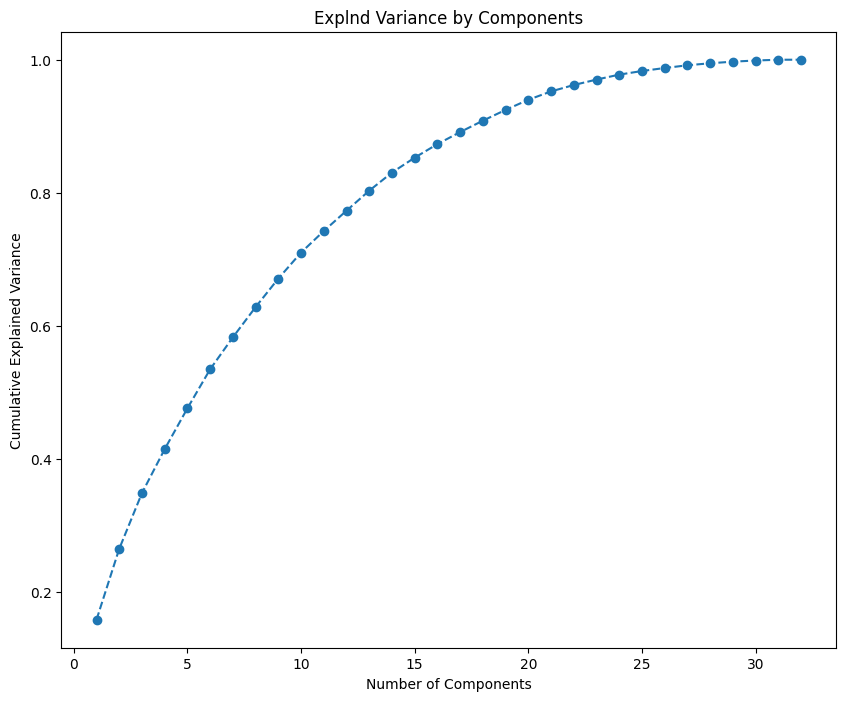

In [37]:
plt.figure(figsize = (10,8))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explnd Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [38]:
# using the derived number of components
pca = PCA(n_components = number_of_components)
pca.fit(scaled_data)

PCA(n_components=21)

In [39]:
scores_pca = pca.transform(scaled_data)

In [40]:
scores_pca.shape

(32, 21)

In [41]:
x_pca = pca.transform(scaled_data)

In [42]:
x_pca.shape

(32, 21)

Text(0, 0.5, 'Second principle component')

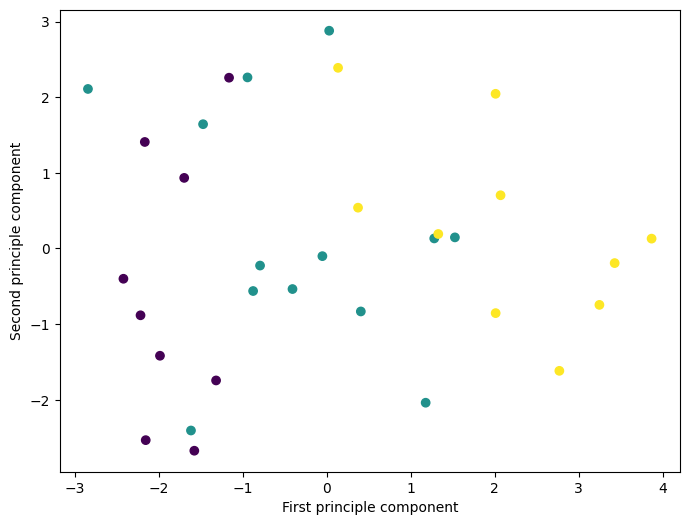

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df[1])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')